In [29]:
import datetime
from json import loads
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import calendar

def date_range(date1, date2):
  start = datetime.datetime.strptime(date1, '%Y-%m-%d')
  end = datetime.datetime.strptime(date2, '%Y-%m-%d')
  step = datetime.timedelta(days=1)
  datelist= []
  while start <= end:
    datelist.append(start.date())
    start += step
  return datelist

def to_date(date):
  return datetime.datetime.strptime(date, '%Y-%m-%d').date()

In [17]:
balance = 3000

# Read transactions
with open('recurring.json') as f:
  recurring = loads(f.read())

# Prepare forecaster
dates = date_range('2018-08-26', '2018-12-31')
transactions = dict()

# Compute debits, credits, and balances per date
for date in dates:

  # Initialize date record
  transactions[date] = dict()

  # ------
  # Debits
  # ------

  debits = dict()

  # Parse monthly
  for k, v in recurring['monthly'].items():
    if v['day'] == date.day:
      debits[k] = v

  # Parse yearly
  for k, v in recurring['yearly'].items():
    if v['month'] == date.month and v['day'] == date.day:
      debits[k] = v

  # Parse one offs
  for due_name, due_dates in recurring['one_off_debits'].items():
    for due_date, due_amount in due_dates.items():
      if to_date(due_date) == date:
        debits[due_name] = dict(amount = due_amount)

  # Assign debits to date record
  transactions[date]['debits']= debits

  # Compute total debits, apply to balance
  due_amount_total = 0

  for k, v in transactions[date]['debits'].items():
    due_amount_total += v['amount']

  balance -= due_amount_total

  # -------
  # Credits
  # -------

  credits = dict()

  # Parse Facebook
  if date.day in recurring['facebook']['days']:
    # balance += recurring['facebook']['amount']
    credits['facebook'] = dict(amount = recurring['facebook']['amount'])

  # Parse one offs
  for owe_name, owe_dates in recurring['one_off_credits'].items():
    for owe_date, owe_amount in owe_dates.items():
      if to_date(owe_date) == date:
        credits[owe_name] = dict(amount = owe_amount)

  # Assign debits to date record
  transactions[date]['credits'] = credits

  # Compute total credits, apply to balance
  owe_amount_total = 0

  for k, v in transactions[date]['credits'].items():
    owe_amount_total += v['amount']

  balance += owe_amount_total

  # Assign summary stats to date record
  transactions[date]['due_amount_total'] = due_amount_total
  transactions[date]['owe_amount_total'] = owe_amount_total
  transactions[date]['balance'] = balance

# Print forecast
# for k, v in sorted(transactions.items()):
#   print(k, v['balance'], v['due_amount_total'], v['owe_amount_total'], v['debits'], v['credits'])

date_list = [k for k, v in sorted(transactions.items())]
balance_list = [v['balance'] for k, v in sorted(transactions.items())]

([<matplotlib.axis.XTick at 0x7f46e3de4668>,
 <a list of 128 Text xticklabel objects>)

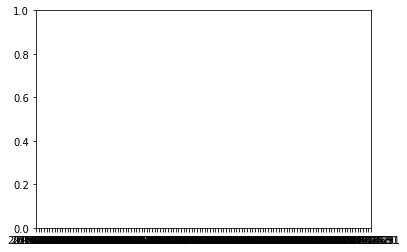

In [25]:
plt.xticks(np.arange(len(date_list)), date_list)

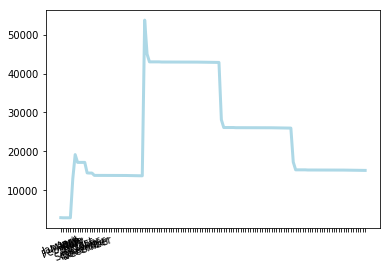

In [31]:
# plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.plot(balance_list, color='lightblue', linewidth=3)
# plt.xticks(np.arange(len(date_list)), date_list, rotation='vertical')
plt.xticks(np.arange(len(date_list)), calendar.month_name[1:13], rotation=20)
# plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
# plt.xlim(0.5, 4.5)
plt.show()

In [16]:
help(plt.xticks)

Help on function xticks in module matplotlib.pyplot:

xticks(*args, **kwargs)
    Get or set the current tick locations and labels of the x-axis.
    
    Call signatures::
    
        locs, labels = xticks()           # Get locations and labels
    
        xticks(locs, [labels], **kwargs)  # Set locations and labels
    
    Parameters
    ----------
    locs : array_like
        A list of positions at which ticks should be placed. You can pass an
        empty list to disable xticks.
    
    labels : array_like, optional
        A list of explicit labels to place at the given *locs*.
    
    **kwargs
        :class:`.Text` properties can be used to control the appearance of
        the labels.
    
    Returns
    -------
    locs
        An array of label locations.
    labels
        A list of `.Text` objects.
    
    Notes
    -----
    Calling this function with no arguments (e.g. ``xticks()``) is the pyplot
    equivalent of calling `~.Axes.get_xticks` and `~.Axes.get_xtick